**Task**: To train a Naive Bayes Classifier that can check series of messages to confirm if it is spam or not

Disclaimer: This code was developed after learning from a demonstrative example in one of my Udemy courses. I do not intend to violate any copyright laws; rather, my goal is to demonstrate the skills I acquired through the course and highlight some of the machine learning projects I have completed.

Link to the udemy course:https://www.udemy.com/course/deep-learning-machine-learning-practical/learn/lecture/14989280#overview



Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data

In [6]:
data=pd.read_csv('emails.csv')

In [7]:
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [8]:
data.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [9]:
data.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [10]:
data.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Visualize

In [13]:
ham=data[data['spam']==0]

In [14]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [15]:
spam_mes=data[data["spam"]==1]

In [16]:
spam_mes

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [17]:
print('spam percentage=', (len(spam_mes)/len(data))*100, '%')

spam percentage= 23.88268156424581 %


In [18]:
print('ham percentage=', (len(ham)/len(data))*100, '%')

ham percentage= 76.11731843575419 %


C:\Users\akino\AppData\Local\Temp\ipykernel_36920\3353609303.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=data, label='Count Spam vs Ham', palette='Set1')


<Axes: xlabel='spam', ylabel='count'>

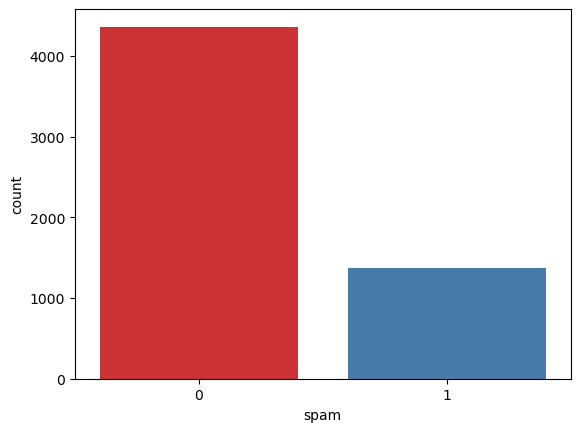

In [19]:
sns.countplot(x='spam', data=data, label='Count Spam vs Ham', palette='Set1')
# sns.countplot(data['spam_mes','ham'])

Testing and Taining Dataset

In [21]:
#Using Count Vectorizer to translate texts to counts; also called sentiment analysis
#feature extraction using count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

#creating fake data
sample_Df=['This is the first document.', 'This document is the second document.', 'And this is the third one.', 'Is this the first document']
#let's see how to translate them into numbers
sample_Df_vectorizer=CountVectorizer()

In [22]:
X=sample_Df_vectorizer.fit_transform(sample_Df)

In [23]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [24]:
print(sample_Df_vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


Application to the task in this project

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
spam_ham_countvectorizer=vectorizer.fit_transform(data['text'])

In [27]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [28]:
print(spam_ham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
#shape
spam_ham_countvectorizer.shape

(5728, 37303)

Model Training

In [31]:
label=data['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.naive_bayes import MultinomialNB

classifier=MultinomialNB()

classifier.fit(spam_ham_countvectorizer, label)



MultinomialNB()

In [33]:
test_sample=['Free dollar!!!', 'Hi Kim, Please let me know if you need any help']
test_sample_countvectorizer=vectorizer.transform(test_sample)

In [34]:
test_predict=classifier.predict(test_sample_countvectorizer)
test_predict


array([1, 0], dtype=int64)

In [35]:
test_sample=['Ayooluwa you have won big money', 'Hello Ayooluwa, could you kindly respond to this message']
test_sample_countvectorizer=vectorizer.transform(test_sample)

In [36]:
test_predict=classifier.predict(test_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

Training and Testing Data Again

In [67]:
x=spam_ham_countvectorizer
y=label

In [73]:
x.shape

(5728, 37303)

In [75]:
y.shape

(5728,)

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [79]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

Model Evaluation

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
y_predict_train=NB_classifier.predict(x_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<Axes: >

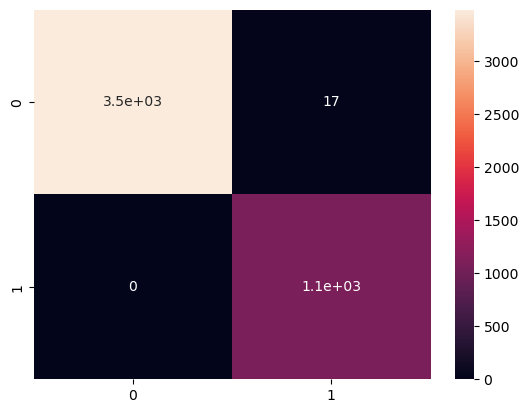

In [88]:
confusionm=confusion_matrix(y_train, y_predict_train)
sns.heatmap(confusionm, annot=True)

In [92]:
y_predict_test=NB_classifier.predict(x_test)
y_predict_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

<Axes: >

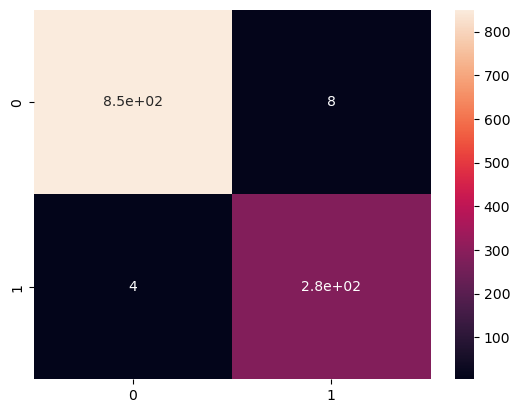

In [94]:
confusionm_1=confusion_matrix(y_test, y_predict_test)
sns.heatmap(confusionm_1, annot=True)

In [98]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       858
           1       0.97      0.99      0.98       288

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

